# Sales Data Analysis and Visualization Project

## Table of Contents
1. [Introduction](#Introduction)
2. [Data Loading and Inspection](#Data-Loading-and-Inspection)
3. [Data Cleaning](#Data-Cleaning)
4. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
    - [Sales Over Time](#Sales-Over-Time)
    - [Sales By Region](#Sales-By-Region)
    - [Sales By Product](#Sales-By-Product)
6. [Conclusion](#Conclusion)

## Introduction

In today's data-driven world, businesses rely heavily on data analysis to make informed decisions and drive growth. The objectives of this project are to inspect, clean, and perform exploratory data analysis (EDA) on sales data in order to gain insights and uncover key trends to motivate business success. The dataset contains information on sales transactions, including date, product, region, quantity, price, and customer information.

We will use Pandas for data processing, and Matplotlib + Seaborn for data visualization.

## Data Loading and Inspection

In [97]:
# import libraries for data processing and visualization
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter, ScalarFormatter
import seaborn as sns
%matplotlib inline

First, we load the data and extract some basic information

In [98]:
sales_data = pd.read_csv('sales_data_sample.csv', index_col='ORDERNUMBER')

# First 5 rows
sales_data.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [99]:
# Describes the data with count, mean, standard deviation, and the "Big 5"
sales_data.describe()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [100]:
null_counts = sales_data.isnull().sum().astype(str) + ' null'
non_null_counts = sales_data.notnull().sum().astype(str) + ' non-null'
dtypes = sales_data.dtypes

# Contains number of null and non-null entries as well as the type of the entry for each column
sales_info = pd.DataFrame({'Non-Null Count': non_null_counts, 'Null Count': null_counts, 'dtype': dtypes,})
print(sales_info)

                 Non-Null Count Null Count    dtype
QUANTITYORDERED   2823 non-null     0 null    int64
PRICEEACH         2823 non-null     0 null  float64
ORDERLINENUMBER   2823 non-null     0 null    int64
SALES             2823 non-null     0 null  float64
ORDERDATE         2823 non-null     0 null   object
STATUS            2823 non-null     0 null   object
QTR_ID            2823 non-null     0 null    int64
MONTH_ID          2823 non-null     0 null    int64
YEAR_ID           2823 non-null     0 null    int64
PRODUCTLINE       2823 non-null     0 null   object
MSRP              2823 non-null     0 null    int64
PRODUCTCODE       2823 non-null     0 null   object
CUSTOMERNAME      2823 non-null     0 null   object
PHONE             2823 non-null     0 null   object
ADDRESSLINE1      2823 non-null     0 null   object
ADDRESSLINE2       302 non-null  2521 null   object
CITY              2823 non-null     0 null   object
STATE             1337 non-null  1486 null   object
POSTALCODE  

## Data Cleaning

From above, we see that ADDRESSLINE2, STATE, and TERRITORY columns have null rows. We would lose way too much valuable information if we dropped these rows. Let's fill in the missing values instead:

In [101]:
sales_data.fillna({'ADDRESSLINE2': 'No Address Line'}, inplace=True)
sales_data.fillna({'STATE': 'No State'}, inplace=True)
sales_data.fillna({'TERRITORY':'No Territory'}, inplace=True)

Now let's check for duplicate rows

In [102]:
duplicate_rows = sales_data.duplicated().sum()
print(f"Number of duplicate rows is {duplicate_rows}")

Number of duplicate rows is 0


Next let's convert the ORDERDATE datatype for additional date-related features 

In [103]:
sales_data['ORDERDATE'] = pd.to_datetime(sales_data['ORDERDATE'])

Finally, let's visualize outliers using boxplots

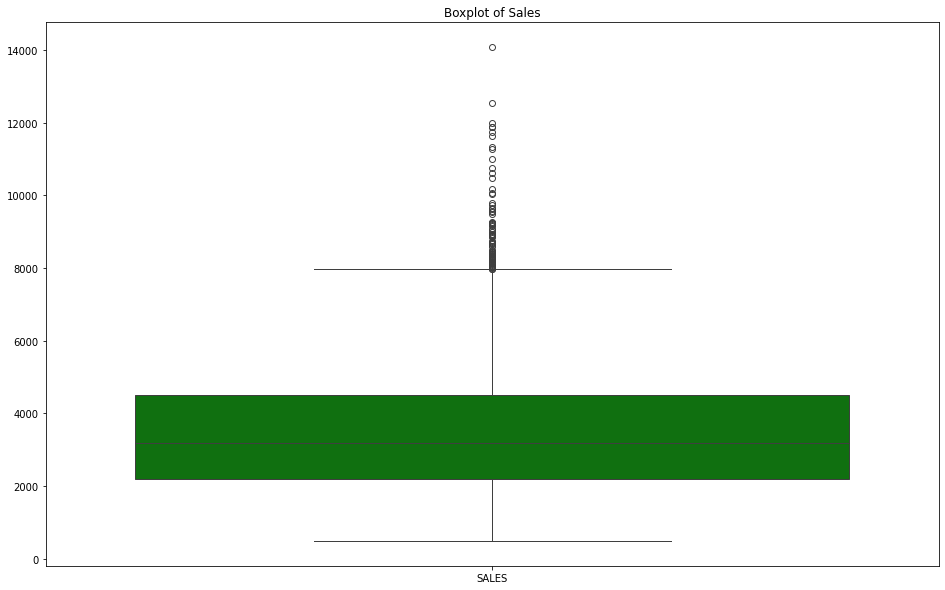

In [104]:
# Visualize outliers for Sales
plt.figure(figsize=(16, 10))
sns.boxplot(data=sales_data[['SALES']], color="green")
plt.title('Boxplot of Sales')
plt.show()

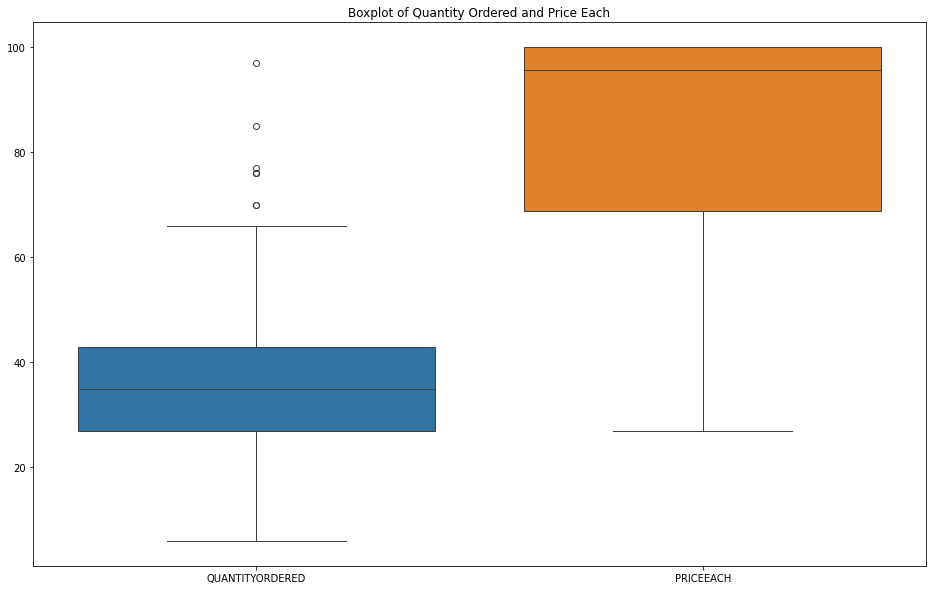

In [105]:
# Visualize outliers for Quantity Ordered and Price Each
plt.figure(figsize=(16, 10))
sns.boxplot(data=sales_data[['QUANTITYORDERED', 'PRICEEACH']])
plt.title('Boxplot of Quantity Ordered and Price Each')
plt.show()

All outliers in this dataset seem to be true outliers (i.e. are not a result of measurement errors, data entry errors, or poor sampling). For this reason, we will not remove any outliers.

From just the box plots we can extract some information about the shape of the distributions of each of these variates. For example, QUANTITYORDERED is fairly symmetric, PRICEEACH has a negative skew (longer left tail), and SALES has a positive skew (longer right tail). We can makes these conclusions by observing the location of the median line relative to the IQR

# Exploratory Data Analysis (EDA)

## Sales Over Time

First we look at the sales over the course of the entire time period

<Axes: title={'center': 'Sales Over Time'}, xlabel='Date', ylabel='Total Sales (Millions)'>

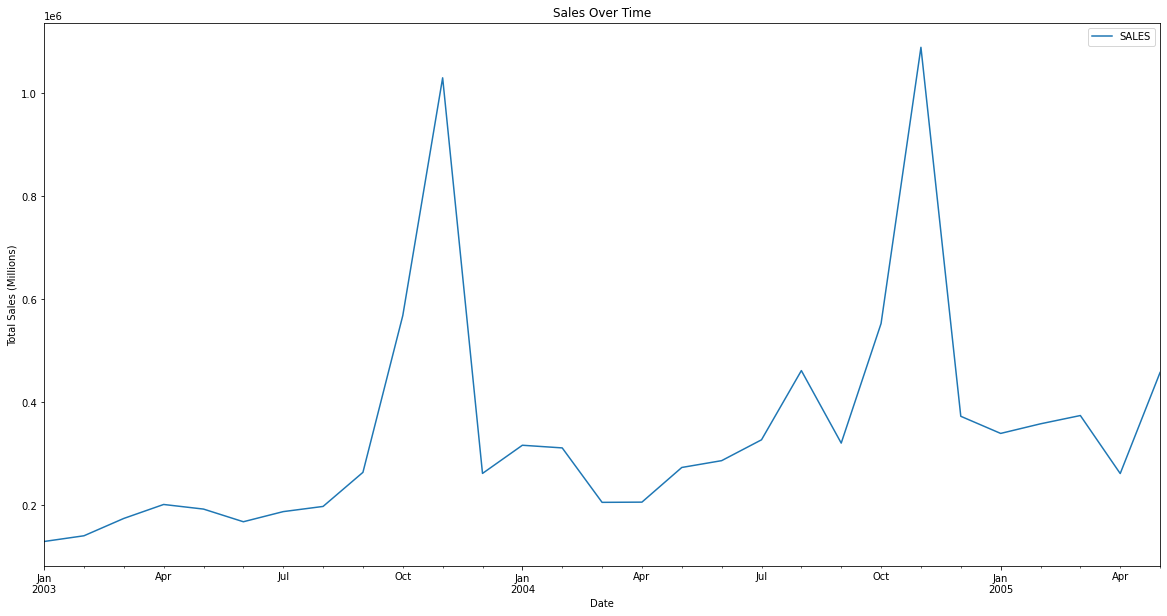

In [106]:
sales_over_time = sales_data.resample('ME',on='ORDERDATE')[['SALES']].sum()
sales_over_time.plot(title="Sales Over Time", xlabel="Date", ylabel="Total Sales (Millions)", figsize=(20, 10))

Notice how there are spikes in sales from September-December. Let's plot information for monthly sales to better visualize the seasonal trends. Sicne there is incomplete data from 2005, we will exclude 2005 from our analysis.

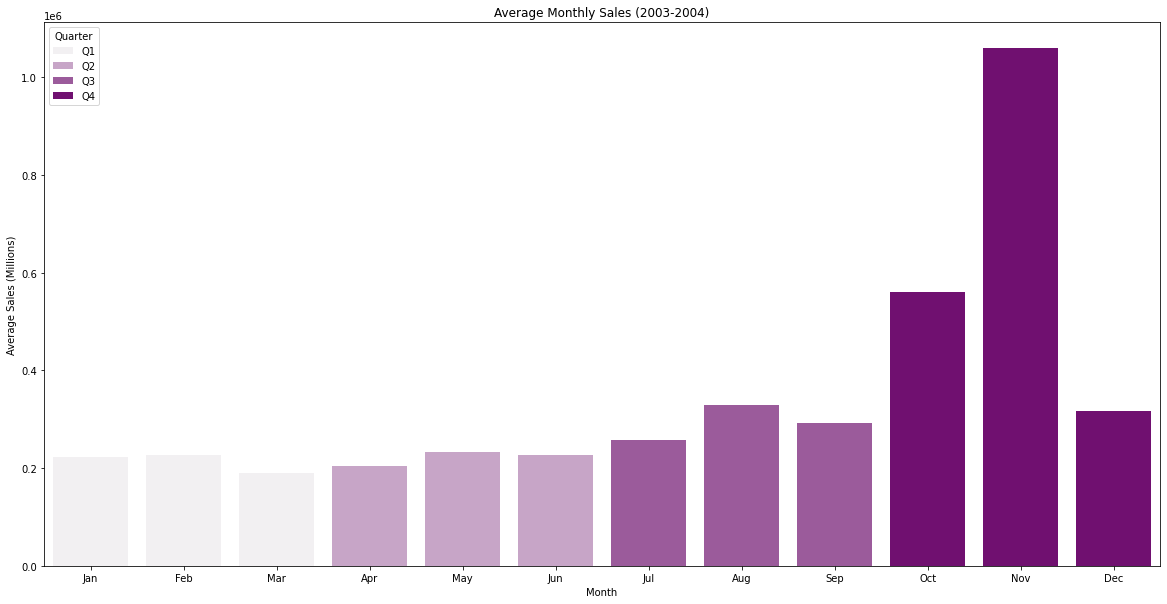

In [107]:
date_filtered_data = sales_data[sales_data['YEAR_ID'] < 2005] # data from 2003 and 2004
total_monthly_sales = date_filtered_data.groupby(['YEAR_ID', 'MONTH_ID', 'QTR_ID'])['SALES'].sum().reset_index()
average_monthly_sales = total_monthly_sales.groupby(['MONTH_ID', 'QTR_ID'])['SALES'].mean().reset_index()

quarter_labels = {
    1: 'Q1',
    2: 'Q2',
    3: 'Q3',
    4: 'Q4'
}

# We map the quarter ids to Q1, Q2, Q3, and Q4 for readability in the legend
average_monthly_sales['QTR_ID'] = average_monthly_sales['QTR_ID'].map(quarter_labels)

plt.figure(figsize=(20, 10))
sns.barplot(x='MONTH_ID', y='SALES', data=average_monthly_sales, palette='light:purple', hue='QTR_ID')

plt.title('Average Monthly Sales (2003-2004)')
plt.xlabel('Month')
plt.ylabel('Average Sales (Millions)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Quarter", loc="upper left")
plt.show()

This makes it clear that sales revenue is at its peak during the fourth quarter. 

## Sales By Region

First, let's look at sales by country, sorted from lowset total sales to greatest total sales.

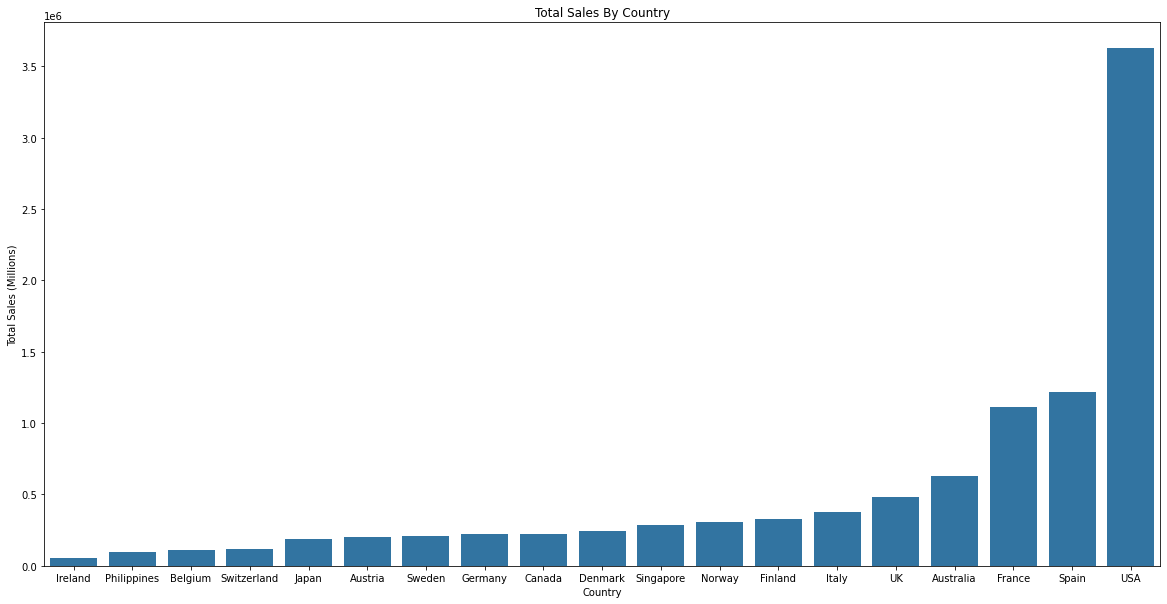

In [108]:
sales_by_country_sorted = sales_data.groupby(['COUNTRY'])['SALES'].sum().reset_index().sort_values(by='SALES')

plt.figure(figsize=(20, 10))
sns.barplot(x='COUNTRY', y='SALES', data=sales_by_country_sorted)
plt.title('Total Sales By Country')
plt.xlabel('Country')
plt.ylabel('Total Sales (Millions)')
plt.show()

Most sales are made by people in the US. Let's explore this further by determining total sales by state, colour coded by country. It is worth noting that only 1337 out of 2823 entries were given a STATE value. We can still obtain useful information despite this, but it`s important to consider that the data is potentially misleading (for example, it is possible that all sales from the US have a STATE value, while all sales from some other country may not have a STATE value, inflating the total value for US states).

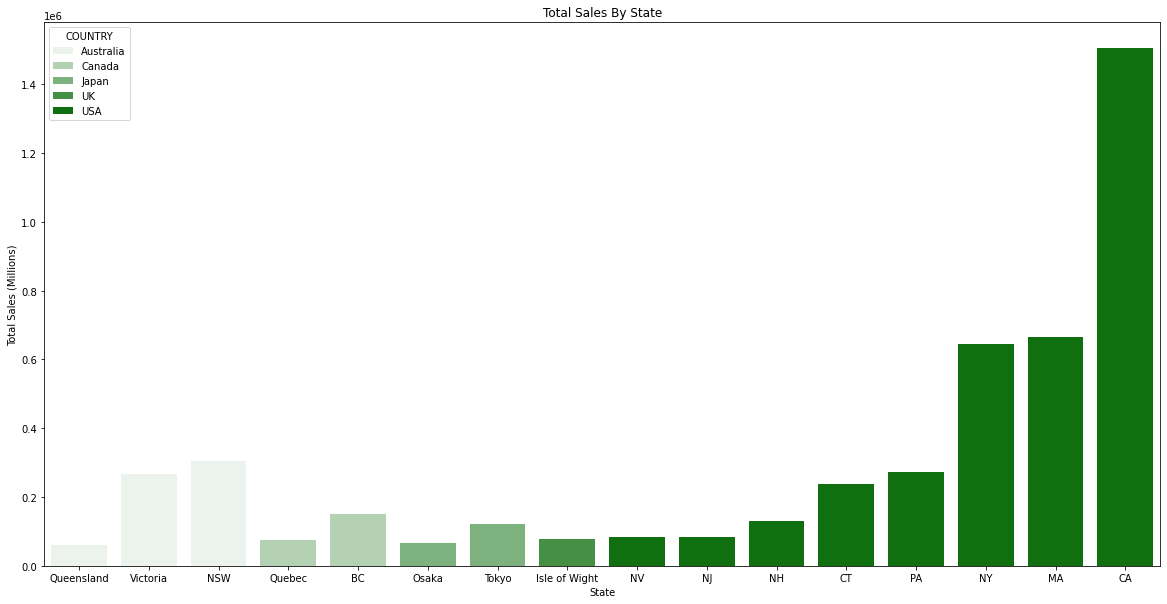

In [109]:
state_filtered_data = sales_data[sales_data['STATE'] != "No State"]
sales_by_state_sorted = state_filtered_data.groupby(['STATE', 'COUNTRY'])['SALES'].sum().reset_index().sort_values(by=['COUNTRY', 'SALES'])

plt.figure(figsize=(20, 10))
sns.barplot(x='STATE', y='SALES', data=sales_by_state_sorted, palette='light:green', hue='COUNTRY')
plt.title('Total Sales By State')
plt.xlabel('State')
plt.ylabel('Total Sales (Millions)')
plt.show()

## Sales by Product

First, let's simply look at the total sales for each product.

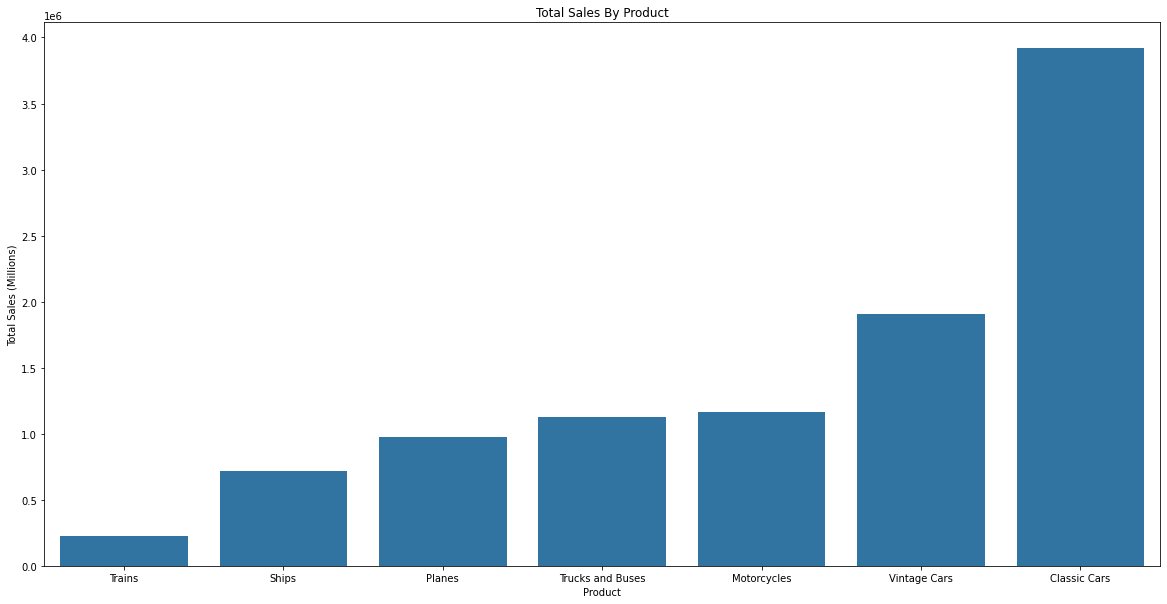

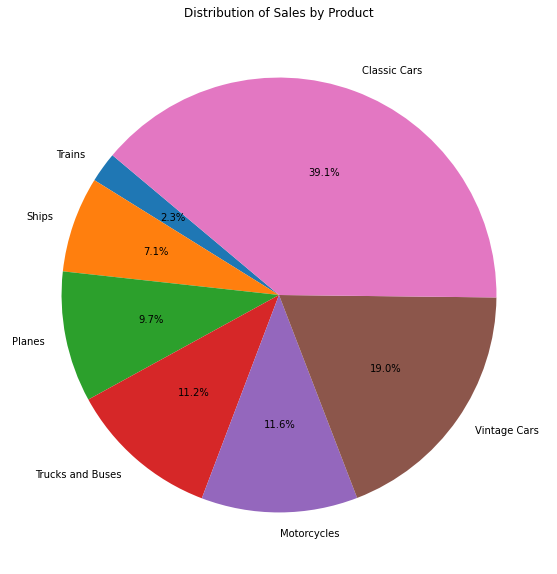

In [110]:
sales_by_product = sales_data.groupby(['PRODUCTLINE'])['SALES'].sum().reset_index().sort_values(by='SALES')

plt.figure(figsize=(20, 10))
sns.barplot(x='PRODUCTLINE', y='SALES', data=sales_by_product)
plt.title('Total Sales By Product')
plt.xlabel('Product')
plt.ylabel('Total Sales (Millions)')
plt.show()

plt.figure(figsize=(10, 10))
plt.pie(sales_by_product['SALES'], labels=sales_by_product['PRODUCTLINE'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sales by Product')
plt.show()

We may want to know the average sales of each product over the course of the year. Perhaps different products have different seasonal trends that should be addressed separately. For a similar reason as before, we will exclude data from 2005.

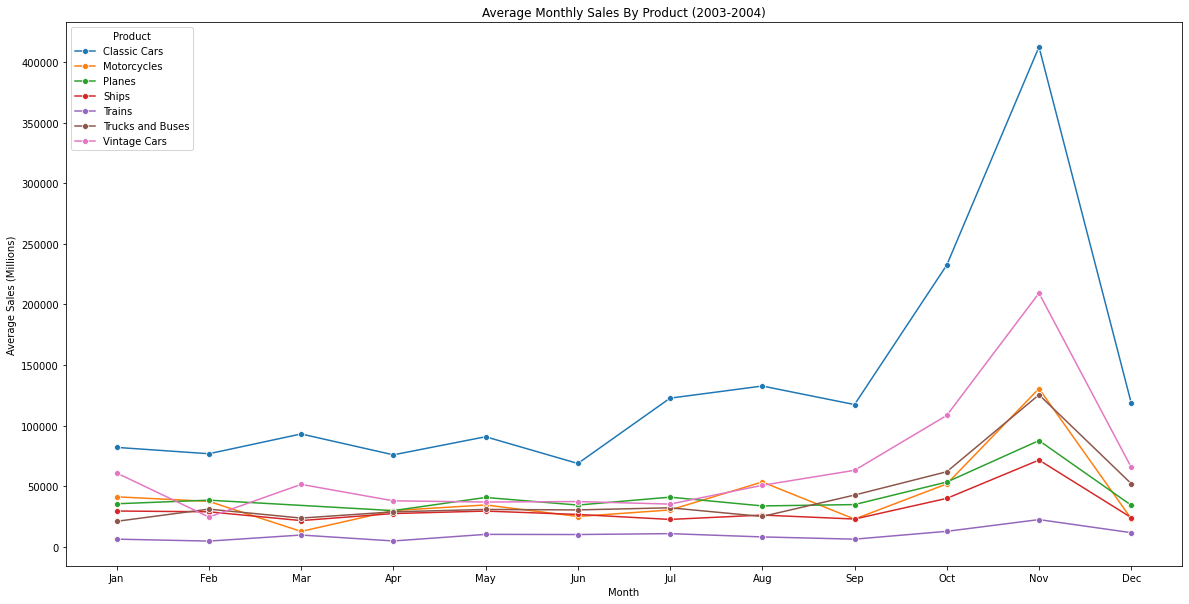

In [111]:
total_monthly_sales_by_product = date_filtered_data.groupby(['YEAR_ID', 'MONTH_ID', 'PRODUCTLINE'])['SALES'].sum().reset_index()
average_monthly_sales_by_product = total_monthly_sales_by_product.groupby(['MONTH_ID', 'PRODUCTLINE'])['SALES'].mean().reset_index()

plt.figure(figsize=(20, 10))
sns.lineplot(x='MONTH_ID', y='SALES', hue='PRODUCTLINE', data=average_monthly_sales_by_product, marker='o')
plt.title('Average Monthly Sales By Product (2003-2004)')
plt.xlabel('Month')
plt.ylabel('Average Sales (Millions)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Product", loc="upper left")
plt.show()

It seems that all products follow a similar trend. That is, there is a spike of sales in November.

Next, let's see the relationship between country and product. People from certain countries may be more likely to buy certain products.

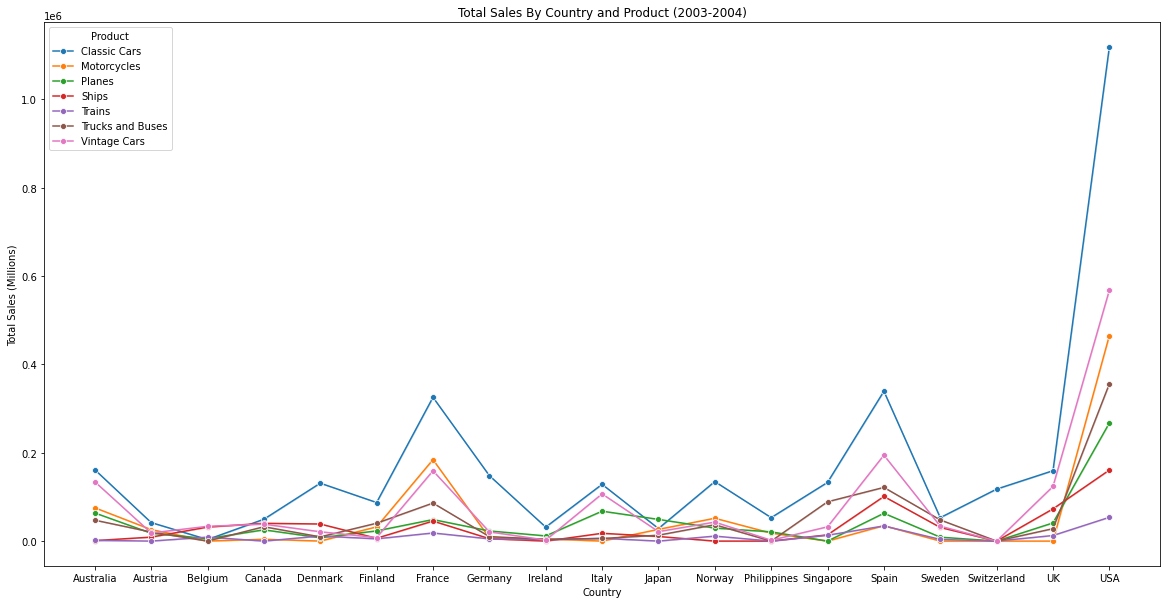

In [112]:
total_regional_sales_by_country = date_filtered_data.groupby(['COUNTRY', 'PRODUCTLINE'])['SALES'].sum().reset_index()

countries = total_regional_sales_by_country['COUNTRY']
products = total_regional_sales_by_country['PRODUCTLINE']

# MultiIndex of all possible country/product combinations
all_combinations = pd.MultiIndex.from_product([countries, products], names=['COUNTRY', 'PRODUCTLINE'])

# Reindex the DataFrame to include all combinations. Fill missing sales with 0
total_regional_sales_by_country_fixed = total_regional_sales_by_country.set_index(['COUNTRY', 'PRODUCTLINE']).reindex(all_combinations, fill_value=0).reset_index()

plt.figure(figsize=(20, 10))
sns.lineplot(x='COUNTRY', y='SALES', hue='PRODUCTLINE', data=total_regional_sales_by_country_fixed, marker='o')
plt.title('Total Sales By Country and Product (2003-2004)')
plt.xlabel('Country')
plt.ylabel('Total Sales (Millions)')
plt.legend(title="Product", loc="upper left")
plt.show()

We can better visualize this with a heatmap:

In [113]:
# TODO heatmap